# LAB 8 - Week 11

This lab will strengthen your ability to translate theoretical knowledge into a practical application, where you'll need to select, implement, and optimize various machine learning approaches to solve business problems. In this lab you will be using carefully selected datasets that mirror actual retail data structures. Using the complete machine learning workflow—from exploratory data analysis and preprocessing to model implementation, evaluation, and result interpretation. 

Scenario

As a junior data scientist at DataVine Analytics, you've been assigned to work with a boutique consulting group that specializes in diverse industry applications of machine learning. Your team serves clients across several sectors, and you've been tasked with developing prototype machine learning solutions using standardized datasets that mirror real-world problems.

Your supervisor has outlined three specific client projects that will test your ability to implement classification, recommendation, and clustering techniques while applying dimensionality reduction and hyper-parameter tuning:

# Regional Crime Pattern Analysis

A premium wine distributor needs to automatically classify wines based on their chemical properties for inventory management and quality control.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Goal

A public policy research firm is aiming to enhance its ability to understand and respond to regional crime trends by developing a data-driven clustering system. Traditional analyses of crime statistics are often limited to summary reports or predefined categories, which may overlook underlying patterns and emerging risks. By applying unsupervised machine learning techniques—such as K-Means and Gaussian Mixture Models—the firm seeks to uncover natural groupings among regions based on their crime profiles. These clusters will inform targeted policy recommendations, resource allocation strategies, and community-specific interventions, ultimately supporting more efficient and evidence-based public safety planning.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Target Variable

This project applies unsupervised learning, specifically clustering, to uncover natural groupings in regional crime data. As such, there is no explicit target variable in this analysis, each row in the dataset represents a U.S. state, with columns measuring rates of Murder, Assault, Urban Population (%), and Rape. The goal is to group these states into clusters based on similarities in their crime profiles, without relying on labeled outcomes.

This approach supports the business goal by identifying latent patterns and segmenting regions with similar crime characteristics, the public policy research firm can enhance strategic planning and develop region-specific interventions—even in the absence of predefined categories or crime classifications.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Strategic Advantages

Resource Optimization: By clustering regions with similar crime patterns, policymakers can allocate law enforcement and social services more efficiently—targeting shared issues with coordinated strategies rather than one-size-fits-all solutions.

Proactive Intervention: Identifying emerging or anomalous clusters enables early warning systems and tailored responses before crime escalates, supporting preventative rather than reactive policing.

Policy Customization: Group-level insights allow for the design of region-specific programs—such as youth outreach, urban planning, or substance abuse support—based on the dominant crime profile of each cluster.

Scalability and Reusability: Once the clustering framework is developed, it can be updated with new crime data over time or applied to other geographic levels (e.g., cities or counties), making it a versatile tool for ongoing analysis.

Communication and Reporting: Visual cluster maps and summaries provide compelling, data-backed narratives for stakeholder engagement, grant applications, and public transparency efforts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Silence the warnings
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak.*")

## 1.3 Regional Crime Pattern Analysis

A public policy research firm requires a data-driven approach to identify patterns in crime statistics across different regions.

In [3]:
df_arrests = pd.read_csv('arrests_data.csv')

In [4]:
df_arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df_arrests.shape

(50, 5)

In [6]:
df_arrests.count()

Unnamed: 0    50
Murder        50
Assault       50
UrbanPop      50
Rape          50
dtype: int64

In [7]:
# Unique Values in 'unnamed' which is the name of US states
df_arrests['Unnamed: 0'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
The column Unnamed: 0 likely contains U.S. state names, but it's not labeled clearly due to how the CSV was exported (often the row index gets saved as a column without a proper name). Renaming it to "State" improves readability, interpretability and functionality.

In [8]:
df_arrests.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
df_arrests.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
df_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
df_arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
df_arrests.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [12]:
# Check duplicates / No duplicates (We already suspected that since there is no state duplicated)
df_arrests[df_arrests.duplicated()].shape[0]

0

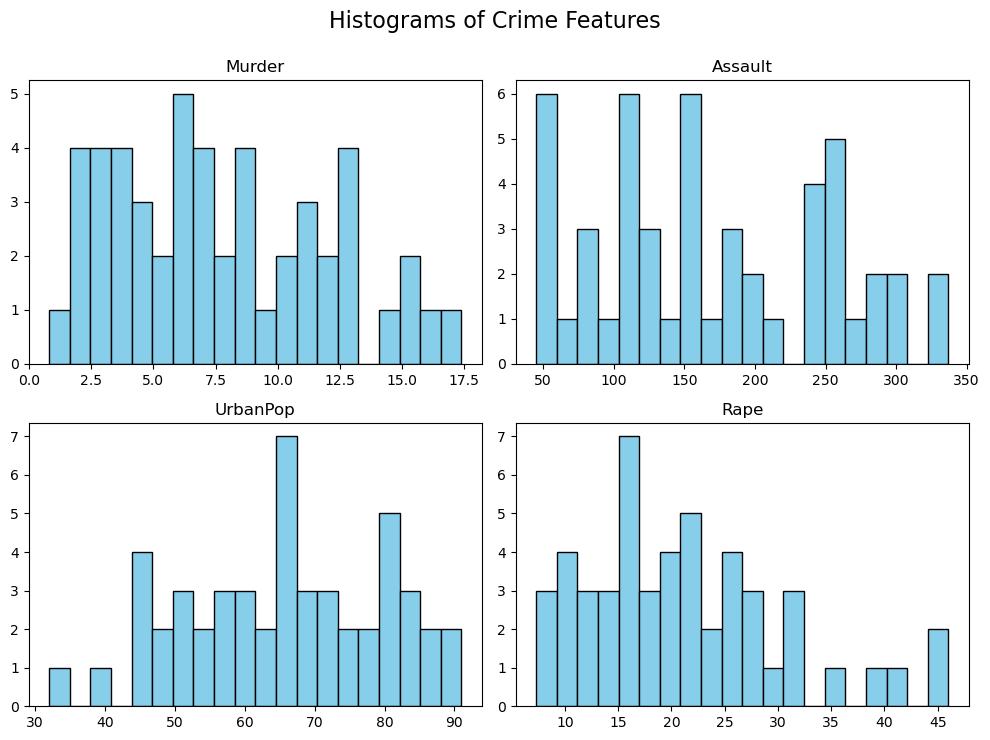

In [13]:
# Visual inspection
# Histograms to detect outliers

# Drop 'State' column
num_features = df_arrests.drop(columns=[df_arrests.columns[0]]).shape[1]
n_rows, n_cols = 2, 2
plt.figure(figsize=(10, 7))

# Plot histogram for each numeric feature (skip the first column with state names)
for i, col in enumerate(df_arrests.columns[1:], 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_arrests[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Histograms of Crime Features", fontsize=16, y=1.05)
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Histograms Observations:

Murder: Distribution is right-skewed, most states have murder rates between 2 and 10 per 100,000 and few states have significantly higher rates (~15–17), suggesting potential outliers.

Assault: Fairly spread out, but with a peak around 100–150, values range from ~45 to 330, indicating broad variability in assault rates and distribution is somewhat multimodal, possibly reflecting distinct regional patterns.

UrbanPop: Fairly uniform distribution with no strong skew, most states have urban population percentages between 50% and 80%, so less variability compared to other features.

Rape: Right-skewed distribution, most states fall between 10 and 30, with a few higher values near 40–45 and one high-end values may be potential outliers.

A visual inspection of the histograms for each crime feature (Murder, Assault, UrbanPop, and Rape) reveals a small number of high-end values that may appear as outliers. However, these values are not extreme enough to indicate data entry errors or anomalies. Instead, they likely represent real and meaningful variation across U.S. states in crime incidence

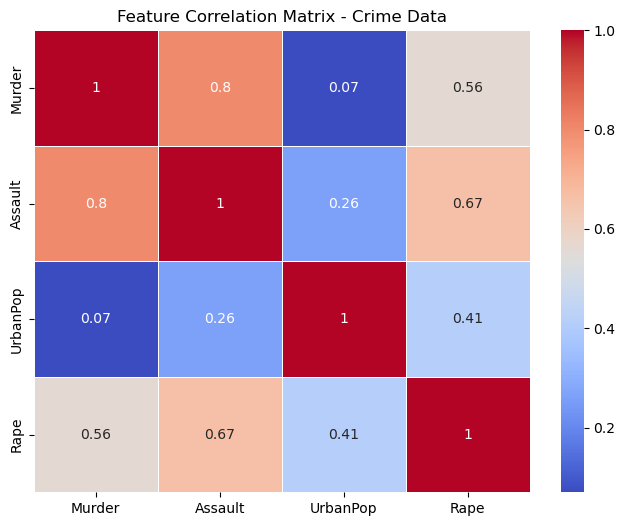

In [14]:
# Heatmap for correlation of the 4 variables

# Drop the state name column
features = df_arrests.drop(columns=[df_arrests.columns[0]])

# Compute the correlation matrix
correlation_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix - Crime Data')
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Heatmap Observations:

- Murder and Assault show a strong positive correlation (r = 0.80), suggesting that states with higher murder rates tend to also report more assaults.

- Assault and Rape are also strongly correlated (r = 0.67), indicating a likely co-occurrence or shared underlying drivers (e.g., urban density, social conditions).

- Murder and Rape have a moderate correlation (r = 0.56), reinforcing the pattern of alignment among violent crime indicators.

- UrbanPop is weakly correlated with the other variables, particularly Murder (r = 0.07), implying that a state’s urban population percentage is not a strong predictor of murder rates in this dataset.

There is moderate to strong collinearity, especially among Murder, Assault, and Rape. While not a critical issue for clustering algorithms like K-Means or GMM, this pattern does justify applying PCA or other dimensionality reduction techniques

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
**Model Chosen: PCA + K-Means and Gaussian Mixture Models (GMM)**

The objective is to uncover natural groupings among U.S. states based on crime rates with no predefined labels. To achieve this, I have selected two complementary clustering approaches: K-Means and Gaussian Mixture Models (GMM) similar to LAB7, both applied after dimensionality reduction via Principal Component Analysis (PCA).

Exploratory analysis revealed moderate to strong collinearity between key features, particularly Murder, Assault, and Rape. This suggests redundancy in the data, which can distort distance-based clustering. PCA helps by removing linear dependencies, reducing noise, highlighting the most informative axes of variation, and enhancing clustering stability without compromising interpretability.

K-Means is a clustering algorithm that assumes clusters are spherical and equally sized. It assigns each state to exactly one cluster (hard clustering), making it highly interpretable for policymakers and analysts. After standardizing the data and applying PCA, K-Means becomes more effective at identifying compact groups based on the dominant crime trends.

While K-Means assumes equal cluster shapes, Gaussian Mixture Models provide a more flexible clustering approach (soft clustering). GMM models each cluster as a Gaussian distribution, allowing for elliptical clusters and probabilistic assignments, which is particularly useful when regional crime patterns overlap or vary in scale. GMM is also more sensitive to subtle patterns that K-Means may overlook.

This combined approach, PCA followed by K-Means and GMM, is scalable and adaptable to future datasets or finer geographic granularity, it leverages  underlying statistical patterns rather than predefined labels and it is actionable, producing interpretable clusters that support targeted timely interventions and resource planning. 

These models together support the project’s broader goal: enabling public policy teams to uncover, understand, and respond to regional crime patterns using transparent, replicable methods.

### Standardize numerical features to improve model performance.

In [15]:
# Drop the state name column and isolate features
X = df_arrests.drop(columns=[df_arrests.columns[0]])

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled.shape

(50, 4)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Summarize the Dataset to Confirm Its Structure**

The df_arrests dataset was successfully loaded and prepared for unsupervised learning tasks related to regional crime pattern analysis. It contains 50 observations—each representing a U.S. state—and 4 numerical features: Murder, Assault, UrbanPop, and Rape. An additional column originally named Unnamed: 0 was correctly identified as containing state names and renamed to State to improve clarity and usability.

All features are of numeric type (int64 or float64), and the dataset contains no missing values or duplicate entries. Descriptive statistics and histograms confirm the presence of natural variation in crime rates across states, with only a few high values that are contextually realistic and not treated as outliers.

A correlation heatmap revealed moderate to strong linear relationships among Murder, Assault, and Rape, supporting the decision to apply dimensionality reduction (PCA) to address feature redundancy and enhance clustering performance.

All numerical features were standardized using StandardScaler, transforming them to have zero mean and unit variance. This preprocessing step ensures that each feature contributes equally to the distance calculations used by clustering algorithms such as K-Means and GMM.

In summary, the dataset is clean, correctly structured, and analytically ready for the next stages of modeling, including dimensionality reduction and unsupervised clustering.

## Clustering (K-Means & GMM) on the USArrests Dataset

### Identify clusters in crime data using feature selection and dimensionality reduction.

Standardize the dataset for consistency: 

With the numerical features standardized, the next step is to identify natural groupings of U.S. states based on their crime profiles using unsupervised clustering

### Select the top 3 relevant features for clustering.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The top three most relevant features for clustering are based on a combination of domain knowledge and EDA. These features were selected prior to PCA and clustering to retain the ability to interpret results using real-world crime categories.

Assault – Highest variance and strongest overall correlations (e.g., with Murder and Rape), making it a dominant driver of crime pattern differences across states.

Rape – Moderately correlated with both Murder and Assault, and exhibits significant variability across regions, capturing aspects of personal safety and social conditions.

Murder – Although highly correlated with Assault (r = 0.80), it reflects a distinct and extreme type of crime that justifies its inclusion due to policy relevance.

These features were selected before applying PCA to retain the ability to interpret clustering outcomes in terms of real-world crime metrics.

While highly correlated features (e.g., Murder and Assault) introduce redundancy, we chose to retain them due to their distinct policy relevance and interpretability. UrbanPop, while not redundant, was excluded due to its weaker relationship to the core clustering objective — uncovering violent crime patterns

### Apply PCA to reduce the dataset to 2 principal components.

In [18]:
pca = PCA(n_components=2)

In [19]:
X_pca = pca.fit_transform(X_scaled)

In [20]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The first two principal components explain approximately 86.7% of the total variance in the dataset. This confirms that most of the original information is preserved, and dimensionality can be safely reduced from 4 to 2 for clustering and visualization purposes. The reduced space retains the dominant patterns in the data while minimizing noise and redundancy.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Applying PCA before clustering offers several advantages, especially when features are correlated—as is the case with this dataset, where variables like Murder, Assault, and Rape show strong interrelationships (e.g., Murder–Assault r = 0.80). PCA helps eliminate this redundancy by transforming the data into uncorrelated principal components, which capture the most significant variance. This not only improves the stability and efficiency of clustering algorithms like K-Means and GMM but also enables clean 2D visualizations that reveal latent structure in the data. PCA is particularly useful when the goal is to understand underlying patterns rather than directly interpret raw feature values. However, PCA may be less suitable if interpretability of the original variables is a primary concern, if too much variance is lost during dimensionality reduction (e.g., <80%), or if the dataset consists of only a few, already uncorrelated features—conditions that do not apply here

## Determine Optimal Clusters for K-Means (Elbow Method)

To identify the optimal number of clusters for K-Means, we use the Elbow Method, which examines how the within-cluster sum of squares (WCSS) decreases as the number of clusters increases. The "elbow point" represents a balance between model complexity and explained variance, where adding more clusters yields diminishing returns.

In [21]:
wcss = []
k_values = range(1, 10) # reasonable range of cluster counts 

for k in k_values:       
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Algorithm will run 10 times with different initial centroid seeds
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

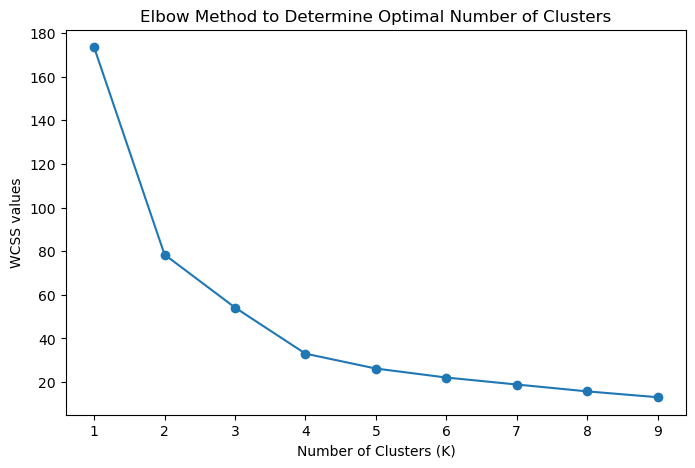

In [22]:
# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS values")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Elbow Plot Observations:

The chart shows a sharp decline in WCSS from K=1 to K=4, after which the rate of improvement flattens out. The "elbow" — where additional clusters yield diminishing returns — appears to occur at K = 4.

This suggests that 4 clusters is an appropriate and efficient choice for segmenting U.S. states based on their crime profiles. It balances model simplicity with explanatory power and will be used as the basis for further clustering with both K-Means and GMM.

## Determine Optimal Clusters for GMM (AIC & BIC)

To select the optimal number of components for Gaussian Mixture Models, we rely on AIC and BIC statistical criterias, which evaluate model fit while penalizing complexity. Both scores help avoid overfitting by balancing goodness of fit with the number of parameters.

Lower AIC/BIC values indicate better models and BIC is generally more conservative, penalizing complexity more heavily than AIC. By plotting AIC and BIC across different component values, we identify the point where the model achieves the best fit with minimal complexity.

In [23]:
bic_scores = []
aic_scores = []

for k in k_values: # k_values was already defined range(1, 10), same principle
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)  # Algorithm will run 10 times with different initial centroid seeds
    gmm.fit(X_pca)
    bic_scores.append(gmm.bic(X_pca))
    aic_scores.append(gmm.aic(X_pca))

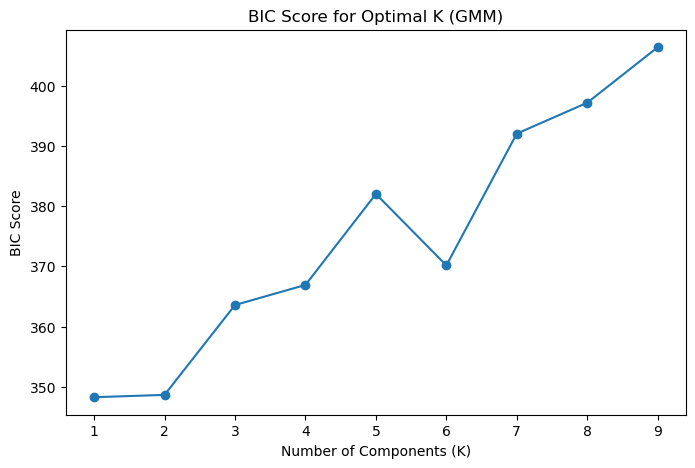

In [24]:
# Plot BIC for GMM
plt.figure(figsize=(8,5))
plt.plot(k_values, bic_scores, marker='o', linestyle='-')
plt.xlabel("Number of Components (K)")
plt.ylabel("BIC Score")
plt.title("BIC Score for Optimal K (GMM)")
plt.show()

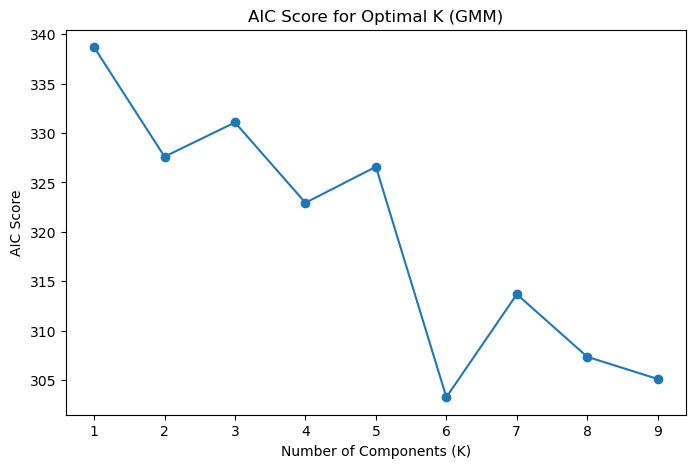

In [25]:
# Plot AIC for GMM
plt.figure(figsize=(8,5))
plt.plot(k_values, aic_scores, marker='o', linestyle='-')
plt.xlabel("Number of Components (K)")
plt.ylabel("AIC Score")
plt.title("AIC Score for Optimal K (GMM)")
plt.show()

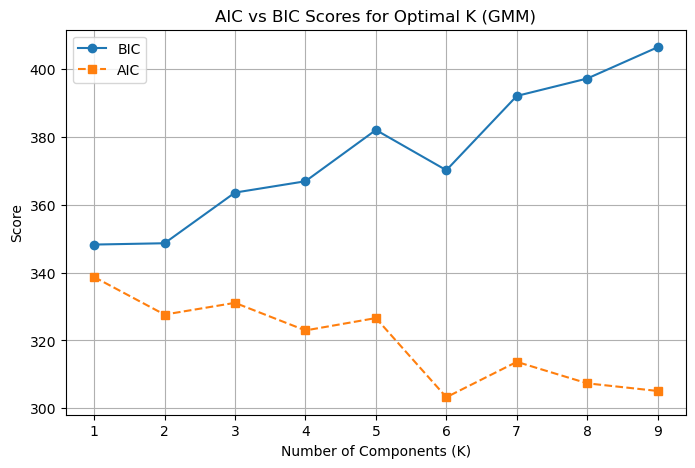

In [26]:
# Plot AIC vs BIC for GMM
plt.figure(figsize=(8,5))
plt.plot(k_values, bic_scores, marker='o', linestyle='-', label='BIC')
plt.plot(k_values, aic_scores, marker='s', linestyle='--', label='AIC')
plt.xlabel("Number of Components (K)")
plt.ylabel("Score")
plt.title("AIC vs BIC Scores for Optimal K (GMM)")
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

AIC/BIC Observations

The AIC and BIC scores were plotted across a range of component values (K = 1 to 9) to determine the optimal number of clusters for the Gaussian Mixture Model, using the PCA-transformed data. BIC reaches its lowest value at K = 1, indicating a preference for the simplest possible model and suggesting that the data may not have strong, distinct clusters under this criterion. AIC, on the other hand, continues to decrease and reaches its minimum at K = 6, favoring a more complex model that better fits the data. This divergence highlights a common trade-off: AIC is more flexible and focused on fit, while BIC is more conservative and penalizes complexity more heavily. In this case, we proceed with K = 6 for GMM, aligning with AIC's guidance, while acknowledging that BIC supports a more parsimonious interpretation.

For real world takeaway, business or policy-making often favor interpretability and usefulness over strict statistical minimalism. So going with K = 6 (AIC) for GMM and K = 4 (Elbow) in K-Means is both justifiable and strategic.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Conclusion (AIC/BIC vs Elbow Method)

The Elbow Method applied to the PCA-reduced data suggests K = 4 as the optimal number of clusters for K-Means, where the inertia curve begins to flatten—indicating a meaningful separation of crime patterns across regions.

For Gaussian Mixture Models (GMM), AIC and BIC diverged in their recommendations. AIC reaches its minimum at K = 6, favoring a more complex model with improved fit. In contrast, BIC, which penalizes model complexity more heavily, selects K = 1, suggesting no meaningful cluster structure. While statistically valid, BIC’s result is not useful for segmentation and fails to support actionable insights.

Although the lab instructions specify BIC for GMM model selection, we acknowledge its K = 1 outcome does not align with the practical goals of this analysis. Therefore, we proceed with K = 6 for GMM, based on AIC, to ensure the clustering provides interpretable and operational value for public policy and strategic planning.

Additionally, since GMM with K = 1 results in only one cluster, the silhouette score could not be computed, reinforcing the lack of cluster separation under BIC.

This dual-model approach—K = 4 for K-Means and K = 6 for GMM—offers a balanced perspective: combining the clarity of hard cluster assignments with the nuance of probabilistic clustering for richer insight into regional crime dynamics.

## Apply clustering models:

### K-Means for hard cluster assignments.

In [27]:
# Apply K-Means with K = 4 (from Elbow)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca)

### GMM for probabilistic clustering.

In [28]:
# Apply GMM with K = 6 (from AIC)
gmm = GaussianMixture(n_components=6, random_state=42, n_init=10)
gmm.fit(X_pca)
gmm_probs = gmm.predict_proba(X_pca)  # Probabilities (though only 1 column here)
gmm_labels = gmm.predict(X_pca)       # Hard assignments (all 0s if K=1)

### Silhouette Score.

In [29]:
df_results = df_arrests.copy()

df_results["KMeans_Cluster"] = kmeans_labels
df_results["GMM_Cluster"] = gmm_labels

# Silhouette Scores
silhouette_kmeans = silhouette_score(X_pca, df_results["KMeans_Cluster"])
silhouette_gmm = silhouette_score(X_pca, df_results["GMM_Cluster"])

# Return asked for output
print(f"Silhouette Score (K-Means): {round(silhouette_kmeans, 4)}")
print(f"Silhouette Score (GMM):     {round(silhouette_gmm, 4)}")

Silhouette Score (K-Means): 0.444
Silhouette Score (GMM):     0.3324


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The silhouette score for K-Means (K = 4) is 0.444, which indicates moderate cluster separation and cohesion — suggesting reasonably well-defined groupings in the PCA-reduced space.
For GMM (K = 6, from AIC), the silhouette score is 0.333, slightly lower but still positive, indicating some structure in the soft clustering, though with more overlap between clusters.

While K-Means outperforms GMM slightly in terms of silhouette score, GMM provides richer probabilistic assignments, which can be valuable in more nuanced or overlapping crime profiles.

## Visualize and compare clustering results.

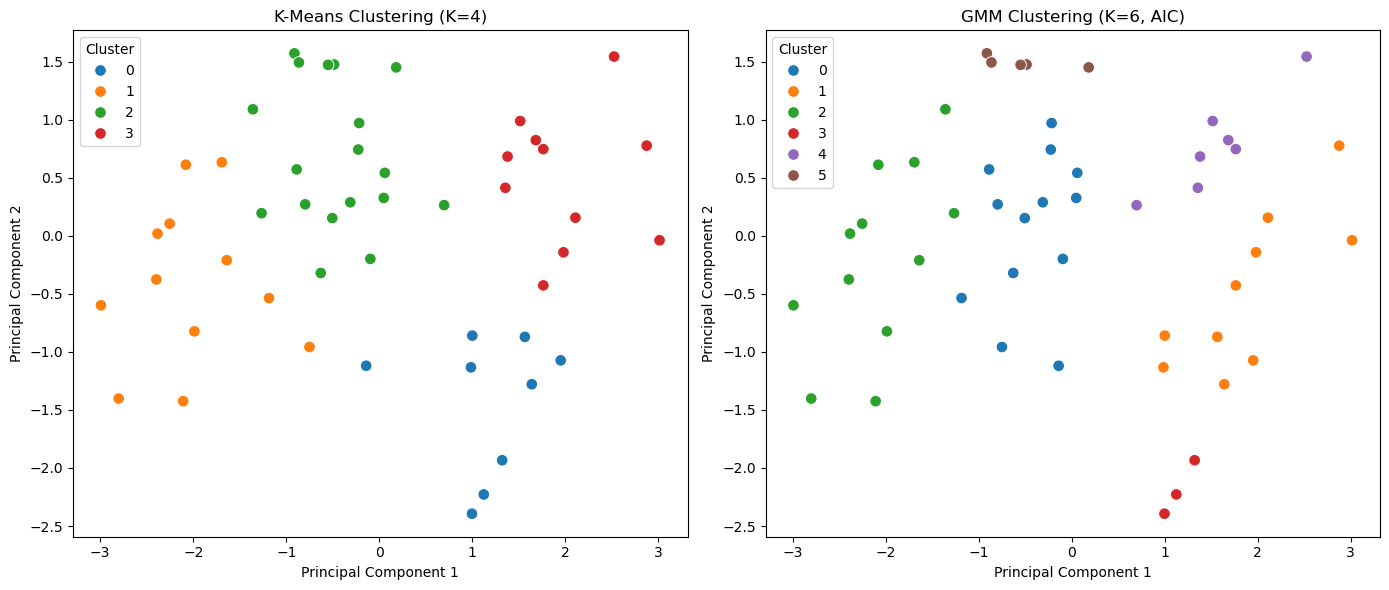

In [30]:
# Attach PCA components for plotting
df_results["PC1"] = X_pca[:, 0]
df_results["PC2"] = X_pca[:, 1]

# Set up figure
plt.figure(figsize=(14, 6))

# K-Means Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_results, x="PC1", y="PC2", hue="KMeans_Cluster", palette="tab10", s=70)
plt.title("K-Means Clustering (K=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")

# GMM Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_results, x="PC1", y="PC2", hue="GMM_Cluster", palette="tab10", s=70)
plt.title("GMM Clustering (K=6, AIC)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Cluster visualization observations:

k-Means (K = 4 / Hard Clustering) is well-separated in groups. Each cluster is compact and distinct, which is ideal for K-Means (it prefers spherical, evenly distributed clusters). It is also great for practical segmentation — e.g., "States in Cluster 2 have the highest crime rates."

GMM (K = 6 / Soft Clustering) shows more nuance and overlap across groups, so clusters aren’t as tightly packed. Some clusters (like the brown and purple ones) appear to capture smaller or more specific subgroups. This is useful to understand uncertainty or probabilistic membership (e.g., "State A is 70% prob in Cluster 3 and 30% prob in Cluster 5").

## Visualize and compare clustering results with States names

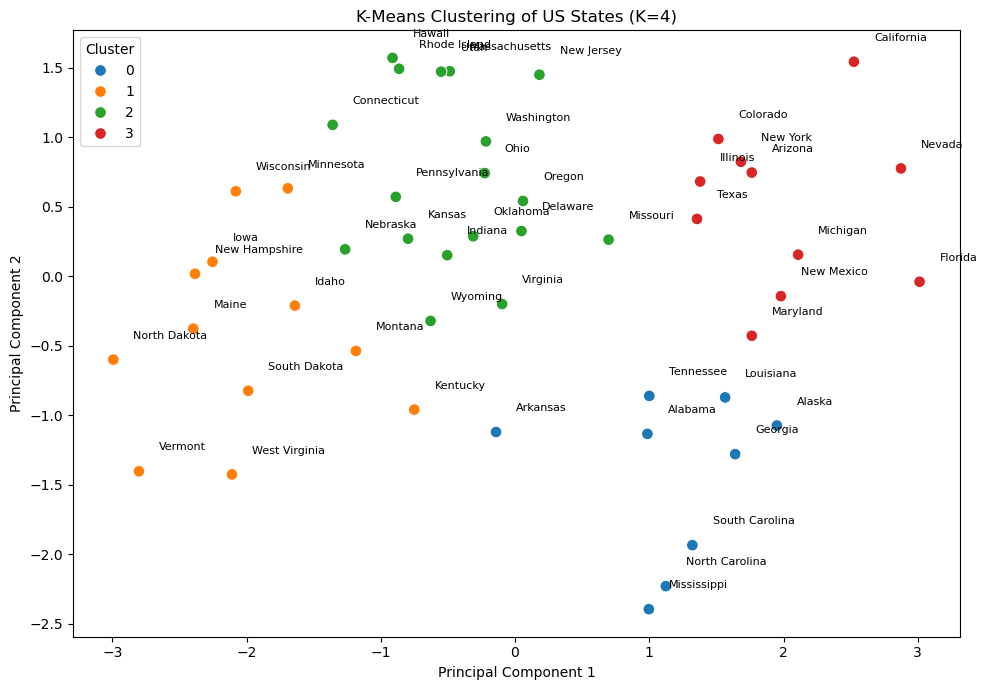

In [34]:
# Attach PCA components for plotting
df_results["PC1"] = X_pca[:, 0]
df_results["PC2"] = X_pca[:, 1]
df_results["State"] = df_arrests["State"]  # Add State column if not already included

# Set up figure
plt.figure(figsize=(10, 7))

# K-Means Clusters with State Names
sns.scatterplot(
    data=df_results,
    x="PC1",
    y="PC2",
    hue="KMeans_Cluster",
    palette="tab10",
    s=70
)

# Annotate each point with the corresponding state name
for _, row in df_results.iterrows():
    plt.text(row["PC1"] + 0.15, row["PC2"] + 0.15, row["State"], fontsize=8)

plt.title("K-Means Clustering of US States (K=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Obervations from Visualization and compare clustering with States names

The K-Means clustering of U.S. states using PCA-reduced crime data reveals distinct regional groupings that align with broader sociopolitical and urbanization trends:

Cluster 0 (Deep South & Appalachia): Includes states like Alabama, Mississippi, Georgia, South Carolina, North Carolina, and Louisiana. These states are associated with higher violent crime rates, particularly assault and murder, combined with relatively lower urbanization. This cluster highlights systemic socio-economic challenges and structural inequalities affecting crime rates in the southeastern U.S.

Cluster 1 (Rural & Low-Crime States): Composed mostly of northern and midwestern states such as North Dakota, South Dakota, Vermont, Maine, and Iowa. These states show consistently low crime rates across all features and are generally less urbanized, representing more rural, sparsely populated regions with stable social dynamics.

Cluster 2 (Moderate-Crime, Industrial Midwest & Northeast): Includes states like Pennsylvania, Ohio, Wisconsin, and Massachusetts. These regions exhibit moderate crime profiles and more balanced levels of urbanization. The cluster reflects historically industrial states that may be transitioning socioeconomically.

Cluster 3 (High-Crime, Urbanized States): Dominated by densely populated urban states such as California, Florida, New York, Illinois, and Maryland. These states have higher rates of rape and assault, reflecting both population density and complex urban crime dynamics. This cluster represents states with large metropolitan areas and potentially better crime reporting.

California (analysis example): This state is far to the right in Principal Component 1 (PC1), which likely captures overall crime severity, since it’s derived from variables like Murder, Assault, UrbanPop, and Rape. In PCA space, California appears to be an extreme outlier, suggesting it has consistently high values across multiple crime variables.

### Example of 3D Chart 

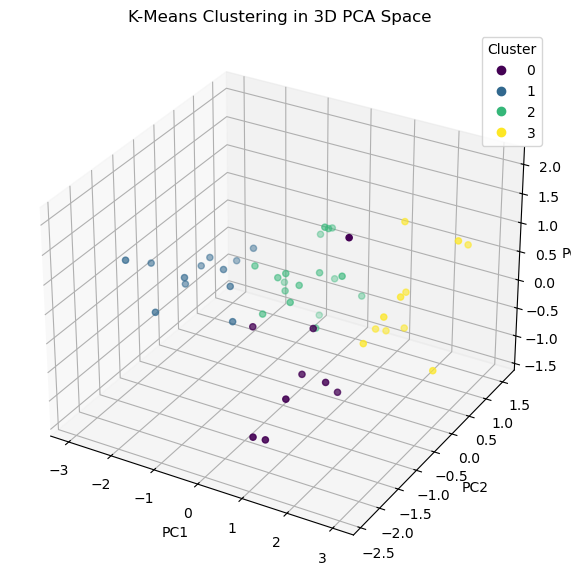

In [32]:
# PCA to 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D scatter
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=df_results["KMeans_Cluster"], cmap='viridis')
ax.set_title("K-Means Clustering in 3D PCA Space")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Conclusions**

This project successfully applied unsupervised learning techniques — K-Means and Gaussian Mixture Models (GMM) — to uncover natural groupings in U.S. crime statistics. The analysis focused on violent crimes using four key features: Murder, Assault, Rape, and UrbanPop. These were standardized and reduced to two principal components using PCA, preserving over 86% of the original variance and enabling clearer visual clustering.

Using the Elbow Method on the PCA-transformed data, K-Means identified 4 distinct clusters, suggesting meaningful regional differences in crime patterns. In contrast, the model selection for GMM revealed a divergence: BIC recommended K = 1, indicating minimal cluster structure, but AIC supported K = 6, highlighting richer subgroup patterns. Since BIC's K = 1 provided no segmentation, the project proceeded with AIC’s K = 6 for GMM to extract more actionable insight.

Cluster visualizations revealed substantial differences between the methods:
1) K-Means produced clean, hard partitions, ideal for regions needing simple classification (e.g., “high-crime vs low-crime” zones).
2) GMM offered probabilistic, nuanced groupings, capturing overlapping regional behaviors that better reflect real-world complexity.

Silhouette scores also confirmed reasonable cluster quality: K-Means: 0.444 and GMM (AIC, K=6): 0.333

The clustering results enable the public policy research firm to segment U.S. regions into crime profiles based on quantitative patterns. These profiles support:

- Targeted policy-making (e.g., allocating law enforcement or prevention resources by cluster).
- Comparative analysis between similar states.
- Crime trend monitoring by cluster over time.

The dual-model approach balances interpretability (K-Means) and flexibility (GMM), offering complementary insights for data-driven regional crime strategy.

The clustering approach is scalable and can be extended to larger or more recent crime datasets. K-Means, in particular, is highly efficient and well-suited for real-time or large-scale policy monitoring tools. While GMM provides richer insights, its computational demands are higher, making it better suited for batch analysis or strategic planning rather than real-time use. PCA further improves performance by reducing dimensionality while preserving core structure

Geographical Implications

These geographically coherent clusters provide actionable insights for regional policy design. This clustering analysis bridges crime statistics with geography, offering a nuanced understanding of how socio-economic and urbanization factors shape regional crime profiles across the U.S.

- Targeted Interventions: Policies aimed at reducing violent crime can be more precisely designed for the South (Cluster 0), while urban areas (Cluster 3) may benefit from enhanced policing, social programs, and justice reform.

- Resource Allocation: States in Cluster 1 may require fewer federal crime prevention resources, while those in Clusters 0 and 3 demand more intensive support.

- Best Practices on states within the same cluster can collaborate on crime prevention strategies, share resources, and study each other’s policies to replicate successful outcomes acting as benchmarks